# 11-1 高斯模糊

In [1]:
import cv2

img = cv2.imread("road.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
cv2.imshow("Normal", img)
cv2.imshow("Gray", gray)
cv2.imshow("Blur", blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 11-2 Canny邊緣偵測

In [1]:
import cv2

def get_edge(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (13, 13), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

img = cv2.imread("road.jpg")
edge = get_edge(img)
cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 11-3 Region of Interest：以管窺天

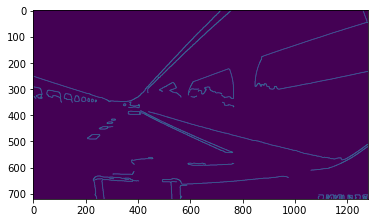

In [3]:
import cv2
import matplotlib.pyplot as plt
import autocar_module as m

try:
    img = cv2.imread("road.jpg")
    edge = m.get_edge(img)
    plt.imshow(edge)
    plt.show()
except:
    print("error")

In [3]:
print(type(gray))
print(gray.shape)

<class 'numpy.ndarray'>
(720, 1280)


In [1]:
import cv2

img = cv2.imread("road.jpg")
img.shape

(720, 1280, 3)

In [2]:
import numpy as np
np.array([[255, 255, 255], [200, 200, 200]])

array([[255, 255, 255],
       [200, 200, 200]])

In [5]:
import numpy as np

np.array((255, 255, 255)) # () [] 的結果是一樣的

array([255, 255, 255])

In [8]:
np.zeros(10, int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
import cv2
import autocar_module as m
import numpy as np

img = cv2.imread("road.jpg")
edge = m.get_edge(img)
mask = np.zeros_like(edge) # img會變藍色
points = np.array([[[146, 539], 
                    [781, 539], 
                    [515, 417], 
                    [296, 397]]])
cv2.fillPoly(mask, points, 255)
cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import autocar_module as m
import numpy as np

def get_roi(img):
    mask = np.zeros_like(img)
    points = np.array([[[146, 539],
                        [781, 539],
                        [515, 417],
                        [296, 397]]])
    cv2.fillPoly(mask, points, 255)
    roi = cv2.bitwise_and(img, mask) # 調換也可以
    return roi
    
img = cv2.imread("road.jpg")
edge = m.get_edge(img)
roi = get_roi(edge)
cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import autocar_module as m

img = cv2.imread("road.jpg")
edge = m.get_edge(img)
roi = m.get_roi(edge)

cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 11-4 Hough轉換

In [24]:
import cv2
img = cv2.imread("road.jpg")
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
arr = np.array([[[0],[1],[2],[3]]])
arr.shape

(1, 4, 1)

In [5]:
import numpy as np
arr = [[[556, 454, 756, 539]],

 [[511, 439, 590, 475]],

 [[470, 413, 547, 450]],

 [[454, 411, 719, 535]],

 [[208, 488, 302, 415]],

 [[490, 429, 655, 506]],

 [[238, 491, 315, 416]]]
arr = np.array(arr)
print(arr.shape)
for a in arr:
    print(a.reshape(4, ))

(7, 1, 4)
[556 454 756 539]
[511 439 590 475]
[470 413 547 450]
[454 411 719 535]
[208 488 302 415]
[490 429 655 506]
[238 491 315 416]


In [42]:
import cv2
import autocar_module as m
import numpy as np

def draw_lines(img, lines):
    for line in lines:
        #print(line.shape)
        points = line.reshape(4, )
        x1, y1, x2, y2 = points
        cv2.line(img, 
                 (x1, y1), (x2, y2), 
                 (0, 0, 255), 3)
    return img
    
img = cv2.imread("road.jpg")
edge = m.get_edge(img)
roi = m.get_roi(edge)
lines = cv2.HoughLinesP(image = roi,
                        rho = 3,
                        theta = np.pi / 180,
                        threshold = 60,
                        minLineLength = 40,
                        maxLineGap = 50)
print(lines)
print(lines.shape)
if lines is not None:
    img = m.draw_lines(img, lines) # draw_lines(img, lines)
else:
    print("偵測不到直線線段")
cv2.imshow("Line", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[556 454 756 539]]

 [[511 439 590 475]]

 [[470 413 547 450]]

 [[454 411 719 535]]

 [[208 488 302 415]]

 [[490 429 655 506]]

 [[238 491 315 416]]]
(7, 1, 4)


# 11-5 最小平方法：取得最佳直線

In [2]:
import numpy as np

a, b = np.polyfit((1, 2), (3, 4), deg = 1)
print(f"y = {a}x + {b}")

y = 0.9999999999999998x + 2.0000000000000004


In [36]:
import numpy as np
arr = np.array([1, 2, 3, 4])
arr.reshape(4, )

array([1, 2, 3, 4])

In [39]:
import numpy as np

m, b = np.polyfit((238, 315), (491, 416), deg = 1)
print(m, b)

-0.9740259740259742 722.8181818181818


In [3]:
import cv2
import autocar_module as m
import numpy as np

def get_avglines(lines):
    if lines is None:
        print("偵測不到直線線段")
        return None
    lefts = []
    rights = []
    for line in lines:
        points = line.reshape(4, )
        x1, y1, x2, y2 = points
        slope, b = np.polyfit((x1, x2), (y1, y2), deg = 1)
#         print(f"y = {slope}x + {b}")
        if slope > 0:
            rights.append([slope, b])
        else:
            lefts.append([slope, b])
    
    if rights and lefts:
#         print(rights, lefts, sep = "\n")
        right_avg = np.average(rights, axis = 0)
        left_avg = np.average(lefts, axis = 0)
        return np.array([right_avg, left_avg])    
    else:
        print("無法同時偵測到左右邊緣")
        return None
    
def get_sublines(img, avglines):
    sublines = []
    for line in avglines:
        slope, b = line
        y1 = img.shape[0]
        y2 = int(y1 * (3 / 5))
        x1 = int((y1 - b) / slope)
        x2 = int((y2 - b) / slope)
        sublines.append([x1, y1, x2, y2])
    return np.array(sublines)
        
img = cv2.imread("road.jpg")
edge = m.get_edge(img)
roi = m.get_roi(edge)
lines = cv2.HoughLinesP(image = roi,
                        rho = 3,
                        theta = np.pi / 180,
                        threshold = 60,
                        minLineLength = 40,
                        maxLineGap = 50)
avglines = get_avglines(lines)
if avglines is not None:
    lines = get_sublines(img, avglines)
    img = m.draw_lines(img, lines)
    cv2.imshow("Line", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 11-6 實戰：讀取行車紀錄器，模擬開車情況

In [4]:
import cv2
import autocar_module as m
import numpy as np

capture = cv2.VideoCapture("road.mp4")
if capture.isOpened():
    while True:
        success, img = capture.read()
        if success:
            edge = m.get_edge(img)
            roi = m.get_roi(edge)
            lines = cv2.HoughLinesP(image = roi,
                                    rho = 3,
                                    theta = np.pi / 180,
                                    threshold = 30,
                                    minLineLength = 50,
                                    maxLineGap = 40)
            avglines = m.get_avglines(lines)
            if avglines is not None:
                lines = m.get_sublines(img, avglines)
                img = m.draw_lines(img, lines)
            cv2.imshow("Frame", img)
        k = cv2.waitKey(10)
        if k == ord("q") or k == ord("Q"):
            print("exit")
            cv2.destroyAllWindows()
            capture.release()
            break
else:
    print("開啟攝影機失敗")        

exit
